## Problem Statement:

To build an LSTM model that predicts words which falls after the end of a sentence .i.e. generates the words which are likely to appear next for a given sentence.This project considers Donald Trump's Rally Speeches for the purpose of Text generation.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Required Libraries:

In [154]:
import glob
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout
import matplotlib.pyplot as plt
import random

## Reading the data files:

In [4]:
file_list=glob.glob('../input/donald-trumps-rallies/*.txt')
len(file_list)    # There are total 35 text files

35

In [15]:
# Reading each text file and apppending them into a list
text=[]
for file in file_list:
    with open(file,'r') as file:
        text.append(file.read())
text[0][:201]

" Thank you very much everybody. Thank you. Wow. I will never, ever let you down, that I can tell you. Amazing. And I want to thank Manchester and New Hampshire, they're very special. You remember those"

## Text Pre-processing:

In [28]:
# The tokenizer is used to remove special characters,lower case all the remaining characters and split the sentences to words
tokenizer=Tokenizer()

# Fitting the tokenizer on the text to perform the necessary pre-processing
tokenizer.fit_on_texts(text)

#Gives the index of each word
word_text=tokenizer.word_index

#Reverses the above function
idx_text=tokenizer.index_word

# Frequency of each unique word
word_count=tokenizer.word_counts

# Total number of unique words
tot_text=len(word_count)
tot_text

9176

## Building the Features and labels :

In [49]:
# Converts each of the sentence to a list of the corresponding index of each word
seq=tokenizer.texts_to_sequences(text)
seq[0][:10]

[67, 5, 48, 100, 227, 67, 5, 1106, 6, 47]

In [51]:
# The 20 words from a sentence forms the feature and the next word i.e the 21st word forms the label.
features=[]
labels=[]

for s in seq:
    for i in range(0,500):
     
        # Obtaining lists of 20 words
        extract=s[i:i+20]
        features.append(extract[:-1])
        labels.append(extract[-1])

In [123]:
# Shuffling the order for better training
features,labels=shuffle(features,labels,random_state=10)

#75% data will be considered for training
train_end=int(len(labels)*0.75)

#Independent data
train_feat=features[:train_end]
test_feat=features[train_end:]

#Dependent data
train_lab=labels[:train_end]
test_lab=labels[train_end:]

#Converting the lists to numpy arrays
X_train=np.array(train_feat)
X_test=np.array(test_feat)

#Encoding the dependent variable
y_train = np.zeros((len(train_lab), tot_text), dtype=np.int8)
y_test = np.zeros((len(test_lab), tot_text), dtype=np.int8)

for example_index, word_index in enumerate(train_lab):
    y_train[example_index, word_index] = 1

for example_index, word_index in enumerate(test_lab):
    y_test[example_index, word_index] = 1

In [124]:
# Example
print("Input:",' '.join([idx_text[i] for i in X_train[1]]))
print("Label:",' '.join([idx_text[train_lab[1]]]))

Input: deal whether it will be no energy almost of any kind no it's crazy thought of by aoc plus
Label: three


## Building an LSTM model:

In [140]:
#Initialising the model
model=Sequential()

#Adding an Embedding layer with input as total number of texts
model.add(Embedding(input_dim=tot_text,output_dim=100,trainable=True))

#Adding the LSTM layer
model.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))

#Flattening 
model.add(Dense(64,activation='relu'))
#Adding a dropout layer
model.add(Dropout(0.5))
#Output Layer
model.add(Dense(tot_text, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         917600    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 9176)              596440    
Total params: 1,639,544
Trainable params: 1,639,544
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model:

In [141]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fitting the Model on Train data:

In [142]:
my_model=model.fit(x=X_train,y=y_train,epochs=200,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/200
103/103 [==============================] - 17s 141ms/step - loss: 7.9996 - accuracy: 0.0245 - val_loss: 6.3678 - val_accuracy: 0.0434
Epoch 2/200
103/103 [==============================] - 15s 149ms/step - loss: 6.2210 - accuracy: 0.0435 - val_loss: 6.2955 - val_accuracy: 0.0434
Epoch 3/200
103/103 [==============================] - 14s 140ms/step - loss: 6.0668 - accuracy: 0.0408 - val_loss: 6.2771 - val_accuracy: 0.0434
Epoch 4/200
103/103 [==============================] - 15s 145ms/step - loss: 5.9991 - accuracy: 0.0348 - val_loss: 6.3051 - val_accuracy: 0.0434
Epoch 5/200
103/103 [==============================] - 15s 140ms/step - loss: 5.9531 - accuracy: 0.0439 - val_loss: 6.3078 - val_accuracy: 0.0533
Epoch 6/200
103/103 [==============================] - 15s 146ms/step - loss: 5.9310 - accuracy: 0.0436 - val_loss: 6.3098 - val_accuracy: 0.0503
Epoch 7/200
103/103 [==============================] - 15s 144ms/step - loss: 5.8579 - accuracy: 0.0516 - val_loss: 6.3102 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



103/103 [==============================] - 14s 136ms/step - loss: 2.1611 - accuracy: 0.4332 - val_loss: 15.2764 - val_accuracy: 0.1593
Epoch 200/200
103/103 [==============================] - 15s 144ms/step - loss: 2.1603 - accuracy: 0.4258 - val_loss: 15.1576 - val_accuracy: 0.1653


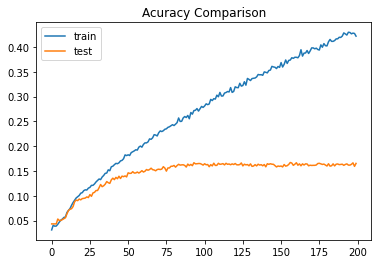

In [153]:
plt.plot(my_model.history['accuracy'],label='train')
plt.plot(my_model.history['val_accuracy'],label='test')
plt.title("Acuracy Comparison")
plt.legend()
plt.show()

#### Inference:

- The model built gave an accuracy score of 42% on Train data and 16% on Test data.

- The model clearly exhibits signs of over-fitting and high bias

- One way to resolve this issue would be to increase the epochs for training the model.

## Generating Text (Prediction):

In [256]:
np.random.seed(10)
seed=20      
new=20

#Randomly selecting a sequence
rand_seq=random.choice(seq)

#Randomly choosing a start for the sequence
start_idx=random.randint(0, len(rand_seq) - seed - 5)

#End point defined as 20 words after the start point
end_idx=start_idx+seed

#Slicing the start and end indexes from the randomly selected sequence
sent=rand_seq[start_idx:end_idx]

#Converting the original sequence to words
original=[idx_text[i] for i in sent]

#The actual list consists of the the original words in addition to 20 following words
actual=sent[:]+rand_seq[end_idx:end_idx+new]

#The list of generated words to consist of the original words in addition to 20 words predicted by the model
generated=sent[:]

for i in range(new):
    
    #The class of the sentence is predicted
    pred=model.predict_classes(np.array(sent).reshape(1,-1))[0]
    new_idx=np.max(pred)
    sent+=[new_idx]
    generated.append(new_idx)



print("Original:"," ".join(original),"\n")
print("Actual:"," ".join([idx_text[i]for i in actual]),"\n")
print("Generated:"," ".join([idx_text[i]for i in generated]))

Original: trump is going to go home early but it wasn't president at that time it was just donald trump he 

Actual: trump is going to go home early but it wasn't president at that time it was just donald trump he will go home early we did that we went home early as victors but we had nine states they had 

Generated: trump is going to go home early but it wasn't president at that time it was just donald trump he said why would they say sir that they say it they can't count their votes they can't count their votes


 ## Conclusion:

- A model was built to generate the rest of the words of an in-complete sentence.

- As per the example above, the model was able to generate words.However, the words generated were not accurate in comparion with the actual words of the speech.

- The reason for this in-accuracy could be the low performance of the model.The model needs to be trained for much higher number of epochs.